In [75]:
# https://data.melbourne.vic.gov.au/People-Events/Multicultural-Community-Profile-2016/gyfq-h9jk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [322]:
data = pd.read_csv(r"Multicultural_Community_Profile_2016.csv")
data.shape


(2376, 6)

In [323]:
# data.head(100)
df = pd.DataFrame(data)
# df.head(df.shape[0])

In [324]:
# df.isna().any()     # find any nan values
# df.loc[df.isna()]   # find nan rows
# df['hasNan'] = df.isnull().sum(axis=1)>0   # find nan values, put in new coloumn
# df[df.hasNan == True].shape[0]   # print num of nan

In [325]:
clean_data = df.dropna()
clean_data.head()

,Profile,Census_Year,Category,Sub_Category,Sub_Order,Value
2,All residents,2016,Country of birth - overview,Australia,1.0,44439.0
3,All residents,2016,Country of birth - overview,Other countries,2.0,75780.0
4,All residents,2016,Country of birth - overview,Not stated,3.0,15724.0
5,All residents,2016,Country of birth - detailed,Australia,1.0,44439.0
6,All residents,2016,Country of birth - detailed,China (excludes SARs and Taiwan),2.0,21418.0
7,All residents,2016,Country of birth - detailed,Malaysia,3.0,6623.0
8,All residents,2016,Country of birth - detailed,India,4.0,6074.0
9,All residents,2016,Country of birth - detailed,Indonesia,5.0,3283.0
10,All residents,2016,Country of birth - detailed,England,6.0,3141.0
11,All residents,2016,Country of birth - detailed,"Korea, Republic of (South)",7.0,3118.0


In [356]:
cats = clean_data['Category'].unique()
cat_keys = pd.DataFrame(cats).sort_values(0)
cat_keys = cat_keys.rename(index=str, columns={0: "Category"})
cat_keys = cat_keys.reset_index(drop=True)
cat_keys['Cat_Ref'] = range(1, len(cat_keys)+1)
cat_keys.head(cat_keys.shape[0])


,Category,Cat_Ref
0,Age,1
1,Ancestry,2
2,Country of birth - detailed,3
3,Country of birth - overview,4
4,Educational institution attendance,5
5,Household composition,6
6,Housing tenure,7
7,Housing type,8
8,Labour force status - detailed,9
9,Labour force status - overview,10


In [361]:
merged = pd.merge(clean_data, cat_keys, how='right')
# merged.head()

In [371]:
# Arrival of year
arrivals = merged.loc[(merged['Cat_Ref']==21) & (merged['Value']>0)]

In [372]:
sub_cats = arrivals['Sub_Category'].unique()

sCat_keys = pd.DataFrame(sub_cats)
sCat_keys = sCat_keys.rename(index=str, columns={0: "Sub_Category"})
# sCat_keys = cat_keys.reset_index(drop=True)
sCat_keys['sCat_Ref'] = range(1, len(sCat_keys)+1)
sCat_keys.head()

,Sub_Category,sCat_Ref
0,Before 2000,1
1,2000-2005,2
2,2006-2010,3
3,2011-2015,4
4,Arrived 2016,5


In [377]:
arrivals = pd.merge(arrivals, sCat_keys, how='right')
arrivals['Profile'] = arrivals['Profile'].str.strip('(country of birth)')
# arrivals.iloc[:,[0, 3, 5]].sort_values(by=['Value'])

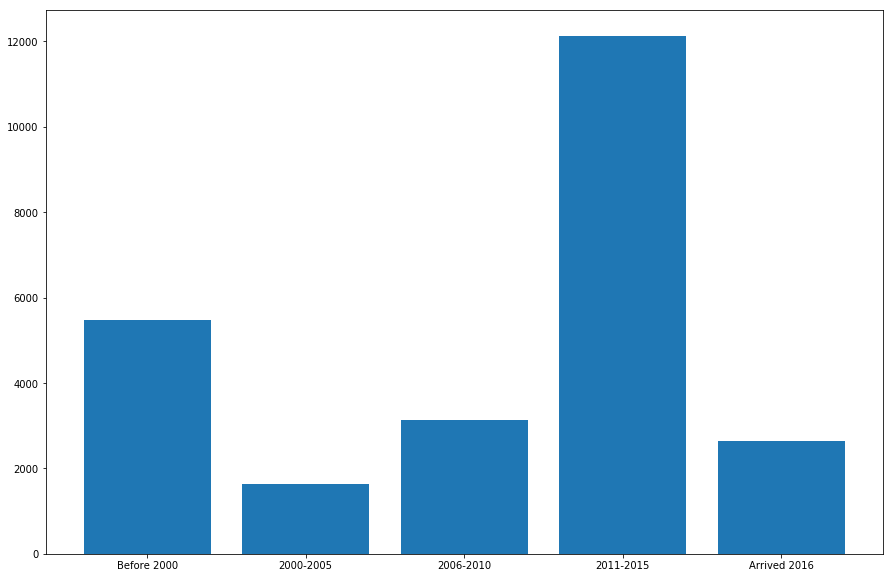

In [378]:
plt.bar(arrivals['sCat_Ref'].values, arrivals['Value'].values)
ticksNum = arrivals['sCat_Ref'].unique()
ticks = np.array(range(1,len(ticksNum)+1))
plt.xticks(ticks, sub_cats)
plt.show()

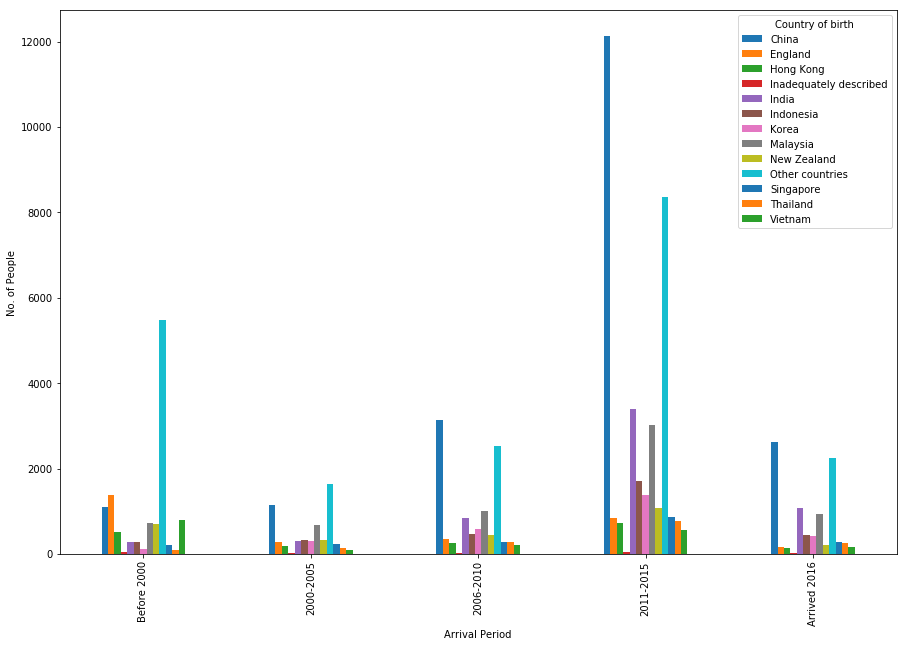

In [395]:
plt.rcParams["figure.figsize"] = [15,10]
arrivals.pivot('sCat_Ref', 'Profile', 'Value').plot(kind='bar')
plt.xlabel('Arrival Period')
plt.ylabel('No. of People')
plt.xticks(ticks-1, sub_cats)
plt.legend(title='Country of birth')
plt.show()

In [404]:
# print(clean_data['Profile'].unique())
age_list = merged.loc[merged['Cat_Ref'] == 1]
age_list = age_list.iloc[:,[0, 3, 5]]
age_list['Profile'] = age_list['Profile'].str.strip('(country of birth)')
age_list = age_list[age_list['Profile'] != 'Not stated']
age_list = age_list[age_list['Profile'] != 'Inadequately described']
age_list = age_list[age_list['Profile'] != 'Overseas visitors']
age_list.head(age_list.shape[0])

,Profile,Sub_Category,Value
70,Australia,0-4 years,3134.0
71,Australia,5-14 years,2867.0
72,Australia,15-19 years,2687.0
73,Australia,20-24 years,5607.0
74,Australia,25-29 years,6775.0
75,Australia,30-34 years,5161.0
76,Australia,35-39 years,3447.0
77,Australia,40-44 years,2540.0
78,Australia,45-49 years,2326.0
79,Australia,50-54 years,2055.0


In [421]:
aus_born = age_list.loc[age_list['Profile'] == 'Australia']
aus_born = aus_born.iloc[:,[1,2]]
aus_born.head()

,Sub_Category,Value
70,0-4 years,3134.0
71,5-14 years,2867.0
72,15-19 years,2687.0
73,20-24 years,5607.0
74,25-29 years,6775.0


In [422]:
overseas_born = age_list[age_list['Profile'] != 'Australia']
# overseas_born['Profile'] = 'Other'
grpBy_ob = overseas_born.groupby(['Sub_Category']).sum()
grpBy_ob.head(20)

,Value
Sub_Category,
0-4 years,701.0
15-19 years,6894.0
20-24 years,21211.0
25-29 years,16548.0
30-34 years,10912.0
35-39 years,5073.0
40-44 years,2880.0
45-49 years,2097.0
5-14 years,981.0
